# Artificial Neural Network

### Importing the libraries

In [4]:
%%capture
!gdown --id 12jCsqTSXmk7BVQvA4wAAdmDwOJqKvTEH

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, BatchNormalization, Dropout
from tensorflow.keras import activations 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
%pwd

'C:\\Users\\idan_sa\\OneDrive - Ituran\\Documents\\notebooks'

## Part 1 - Data Preprocessing

### Importing the dataset

In [105]:
dataset = pd.read_csv('features_31-08-24.csv')
dataset.head()

,Unnamed: 0,filename,date,pocsag,IP,speed_143,azimuth_143,latitude_143,longitude_143,x_143,...,th_05_more_then_5_spikes_55_76_x,th_05_more_then_10_spikes_55_76_x,th_05_more_then_5_spikes_55_76_z,th_05_more_then_05_x_and_th_25_more_then_05_z_spikes_55_76,th_05_more_then_10_x_and_th_25_more_then_05_z_spikes_55_76,x_above_th_in_millisec,y_above_th_in_millisec,z_above_th_in_millisec,spikes_55_76,label
0,0,2020-04-02_pocsag_-2029972679.json,2020/04/02 10:51:11,-2029972679,57.19.1.135,90.0,41.0,32.157940,34.874805,-0.745455,...,0,0,0,0,0,0.0,200.0,200.0,0,1
1,1,2020-04-03_pocsag_-1509882569.json,2020/04/03 12:38:34,-1509882569,55.5.1.166,0.0,156.0,32.083665,34.840595,1.163636,...,0,0,0,0,0,100.0,0.0,0.0,0,1
2,2,2020-04-12_pocsag_771879225.json,2020/04/12 12:08:26,771879225,57.241.1.46,0.0,110.0,32.786349,35.491939,0.800000,...,0,0,0,0,0,140.0,0.0,0.0,0,1
3,3,2020-04-14_pocsag_1241622068.json,2020/04/14 06:21:08,1241622068,52.166.1.74,0.0,57.0,32.817110,35.003075,0.218182,...,1,1,1,1,1,120.0,420.0,120.0,1,1
4,4,2020-04-17_pocsag_-469688012.json,2020/04/17 07:53:56,-469688012,52.33.1.228,14.0,205.0,32.022746,34.911138,-1.709091,...,1,1,1,1,1,100.0,280.0,140.0,1,1


In [106]:

## all features
# dataset= dataset[['is_grater08_abs_x', 'over_15_on_70', 'accident_four_direction', 'std_48_52_x','dist_max_min_48_52_x','max_48_52_x','variance_48_52_x','dist_max_min_48_52_y','max_48_52_y','std_48_52_y','dist_max_min_48_52_z','max_abs_48_52_z', 'spikes_55_76','filename', 'label']]

dataset= dataset[['max_abs_48_52_x', 'over_15_on_70', 'spikes_55_76', 'label']]
dataset.head()

,max_abs_48_52_x,over_15_on_70,spikes_55_76,label
0,1.18,0,0,1
1,3.42,0,0,1
2,3.27,0,0,1
3,8.13,1,1,1
4,8.13,0,1,1


In [107]:
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [109]:
print(X[:,2])

[1.18 3.42 3.27 ... 0.59 0.01 0.99]


### Splitting the dataset into the Training set and Test set

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# seperate all the file names and save it for later
# file_names = X_test[:, -1]

# # drop the file names 
# X_test = X_test[:, :-1]
# X_train = X_train[:, :-1]

In [112]:
from sklearn.utils import resample

# Convert X_train and y_train to DataFrame and Series, respectively
X_train_df = pd.DataFrame(X_train)
y_train_series = pd.Series(y_train, name='label')

# Concatenate the training features and target label
X = pd.concat([X_train_df, y_train_series.reset_index(drop=True)], axis=1)

# Separate minority and majority classes
not_fraud = X[X.label == 0]
fraud = X[X.label == 1]

# Upsample the minority class
fraud_upsampled = resample(fraud,
                           replace=True,  # Sample with replacement
                           n_samples=len(not_fraud),  # Match number in majority class
                           random_state=27)  # Reproducible results

# Combine the majority class with the upsampled minority class
upsampled = pd.concat([not_fraud, fraud_upsampled])

# Check new class counts
label_counts = upsampled.label.value_counts()
print(label_counts)


label
0    6254
1    6254
Name: count, dtype: int64


### Feature Scaling

In [113]:
print(X_test[:,-1])

[0. 0. 0. ... 1. 1. 1.]


In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
print(X_test[:,-1])

[-0.51894791 -0.51894791 -0.51894791 ...  1.92697569  1.92697569
  1.92697569]


In [116]:
# save the scaler
dump(sc, open('standard_scaler_3110.pkl', 'wb'))

## Part 2 - Building the ANN

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(units=nodes, input_dim=X_train.shape[1], activation=activation))
        else:
            model.add(Dense(units=nodes, activation=activation))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model)

In [118]:
model

MyKerasClassifier(batch_size=10,
                  build_fn=<function create_model at 0x0000020AAF0F5B20>,
                  epochs=100)

In [121]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
layers = [[6, 6], [128, 64, 32, 16, 8], [45, 30, 15], [60, 45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size=[128, 8, 64, 32], epochs=[15, 25, 50, 100])

# Setup GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Define early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Fit the grid search with the callbacks
grid_result = grid.fit(X_train, y_train, callbacks=[callback], validation_data=(X_test, y_test))

# Print the best result
print(f"Best Score: {grid_result.best_score_}")
print(f"Best Parameters: {grid_result.best_params_}")


Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6988 - loss: 0.6208 - val_accuracy: 0.7045 - val_loss: 0.6075
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 0.6142 - val_accuracy: 0.7045 - val_loss: 0.5995
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - loss: 0.6052 - val_accuracy: 0.7045 - val_loss: 0.5913
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7057 - loss: 0.5891 - val_accuracy: 0.7045 - val_loss: 0.5816
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - loss: 0.5937 - val_accuracy: 0.7045 - val_loss: 0.5697
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6953 - loss: 0.5742 - val_accuracy: 0.7045 - val_loss: 0.5566
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 0.5566 - val_accuracy: 0.7045 - val_loss: 0.5426
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6953 - loss: 0.5495 - val_accuracy: 0.7045 - val_loss:

In [123]:
[grid_result.best_score_, grid_result.best_params_]

[0.8254964232444764,
 {'activation': 'relu',
  'batch_size': 64,
  'epochs': 100,
  'layers': [60, 45, 30, 15]}]

### Initializing the ANN

In [124]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [125]:
# ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [126]:

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=45, activation='relu'))
ann.add(Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

### Adding the output layer

In [127]:
ann.add(Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [175]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)

In [176]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [177]:
history = ann.fit(X_train, y_train, callbacks=[callback], validation_data=(X_test, y_test), batch_size = 64, epochs = 25)
# history = ann.fit(X_train, y_train, callbacks=[callback], validation_split=0.1, batch_size = 8, epochs = 25)

Epoch 1/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8265 - loss: 0.3876 - val_accuracy: 0.8209 - val_loss: 0.3889
Epoch 2/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8289 - loss: 0.3916 - val_accuracy: 0.8235 - val_loss: 0.3871
Epoch 3/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8216 - loss: 0.3962 - val_accuracy: 0.8191 - val_loss: 0.3877
Epoch 4/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8211 - loss: 0.3998 - val_accuracy: 0.8249 - val_loss: 0.3882
Epoch 5/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8284 - loss: 0.3855 - val_accuracy: 0.8253 - val_loss: 0.3898
Epoch 6/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8352 - loss: 0.3829 - val_accuracy: 0.8249 - val_loss: 0.3869
Epoch 7/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8257 - loss: 0.3966 - val_accuracy: 0.8226 - val_loss: 0.3900
Epoch 8/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8270 - loss: 0.3922 - val_accuracy: 0.

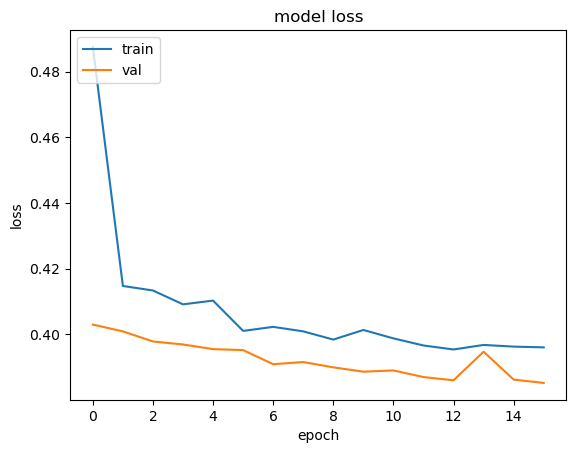

In [131]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

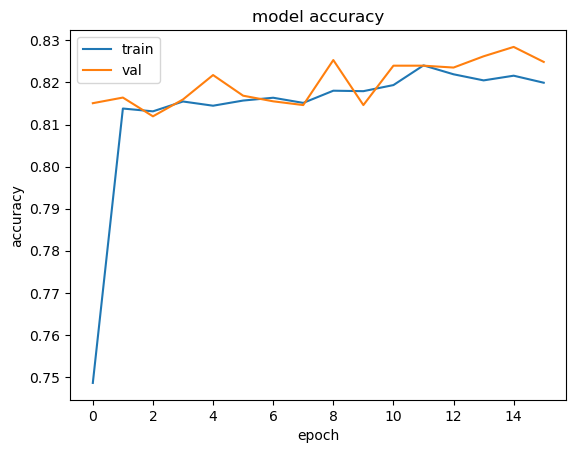

In [132]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()